# Proyecto: Análisis de mercado inmobiliario

Proyecto 2 de Data Science. De deben aplicar las nuevas herramientas obtenidas durante el Bloque 2 para poder obtener un modelo con un mejor rendimiento que el logrado en el Proyecto 1. El dataset utilizado es de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## Librerías utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.inspection import permutation_importance

## Análisis Exploratorio de Datos

Se volvió a hacer un breve análisis de los datos para recordar y resumir el Proyecto 1

In [2]:
#Importamos el Dataset
propiedades = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

Primer análisis general para saber con que datos se cuenta

In [3]:
propiedades.describe(include = "all")

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
count,146660,146660,146660,136735.000000,136701.000000,146660,146660,146660,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05,146660,146660,146660,146660,146660
unique,366,412,366,NaN,NaN,1,4,89,NaN,NaN,NaN,NaN,NaN,NaN,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,NaN,NaN,NaN,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,NaN,NaN,146660,92539,13073,NaN,NaN,NaN,NaN,NaN,NaN,146660,5064,235,107326,146660
mean,NaN,NaN,NaN,-34.604896,-58.465304,NaN,NaN,NaN,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.468428,0.486190,NaN,NaN,NaN,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-35.318457,-180.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-34.627667,-58.504012,NaN,NaN,NaN,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,-34.600943,-58.443262,NaN,NaN,NaN,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,-34.574600,-58.407586,NaN,NaN,NaN,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05,NaN,NaN,NaN,NaN,NaN


In [4]:
propiedades.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


Eliminación de las columnas que por ahora se consideran no útiles o no aportan datos variables

In [5]:
propiedades = propiedades.drop(columns = ["start_date", "end_date", "created_on", "title", "description", "l1", "currency", "operation_type"])

Observación de datos faltantes

In [6]:
print("Cantidad de valores faltantes por columna:\n", propiedades.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64


Análisis del tipo de propiedades con las que se cuenta

Tipos de propiedad y cantidad de instancias por cada una:
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades por cada tipo')

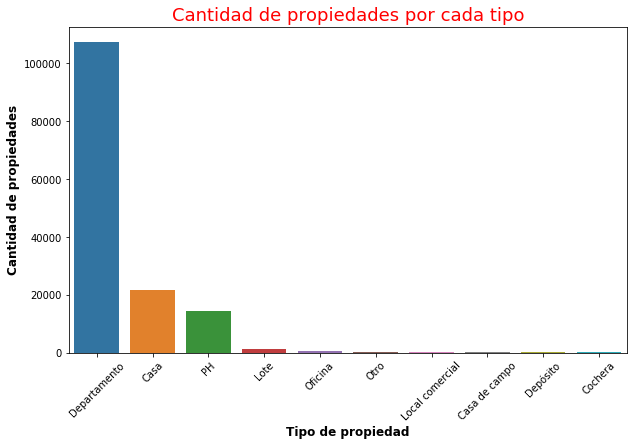

In [7]:
print("Tipos de propiedad y cantidad de instancias por cada una:\n", propiedades["property_type"].value_counts(), sep = "")

plt.figure(figsize = (10,6))
sns.countplot(x = "property_type", data = propiedades, order = propiedades['property_type'].value_counts().index)
plt.xticks(rotation = 45)
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada tipo", fontsize=18, color="red")

Análisis de las ubicaciones de las propiedades

Zonas de Bs. As. y cantidad de instancias por cada una:
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades por cada zona')

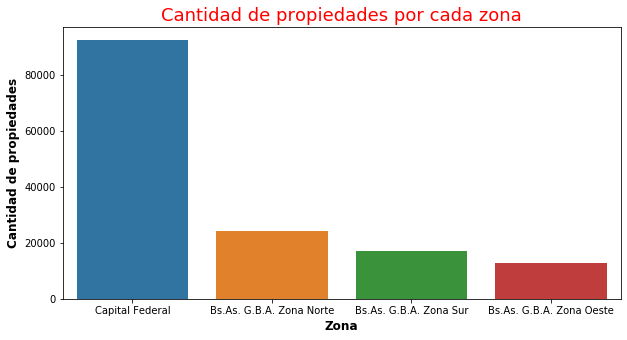

In [8]:
print("Zonas de Bs. As. y cantidad de instancias por cada una:\n", propiedades["l2"].value_counts(), sep = "")

plt.figure(figsize = (10,5))

sns.countplot(x = "l2", data = propiedades, order = propiedades['l2'].value_counts().index)
plt.xlabel("Zona", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada zona", fontsize=18, color="red")

En base a lo observado anteriormente, y siguiendo con la selección utilizada en el proyecto 1, se seleccionan solo los "Departamentos", "Casas" y "PH", ubicados en "Capital Federal".

In [9]:
mask_type = propiedades.property_type.isin(["Departamento", "Casa", "PH"])
seleccion = propiedades[mask_type]
seleccion = seleccion[seleccion.l2 == "Capital Federal"]

In [10]:
#Se elimina la columna que ahora solo contiene el dato "Capital Federal"
seleccion.drop(columns = "l2", inplace = True)

In [11]:
print("Tamaño del Data Frame filtrado:", seleccion.shape)

Tamaño del Data Frame filtrado: (91485, 10)


Se le cambió el nombre a las columnas

In [12]:
seleccion.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')

In [13]:
seleccion.columns = ["Latitud", "Longitud", "Barrios", "Ambientes", "Habitaciones", "Baños", "Superficie_total(m2)", "Superficie_cubierta(m2)", "Precio(USD)", "Tipo_propiedad"]

Se analiza la distribución de los datos

In [14]:
seleccion.describe()

,Latitud,Longitud,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD)
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


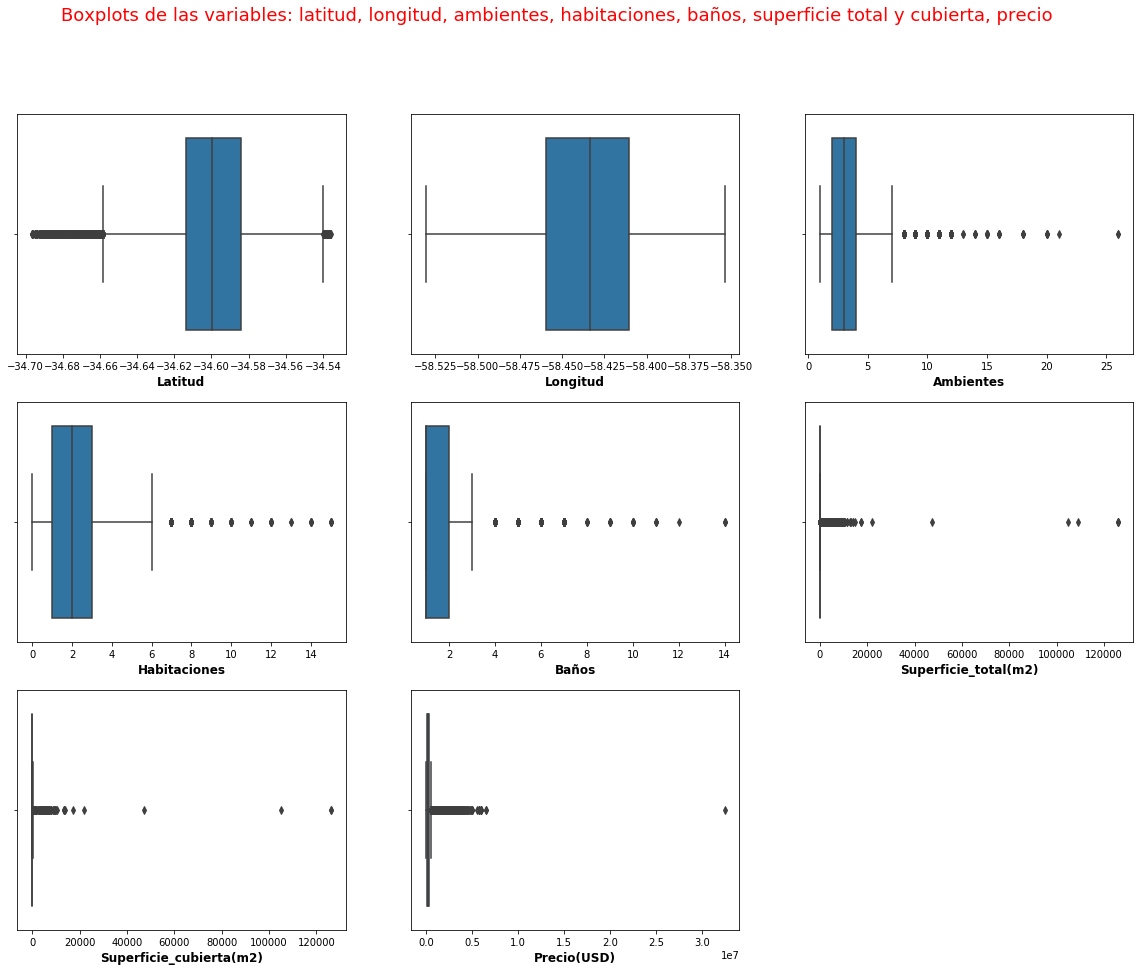

In [15]:
#Graficamos diagramas de caja para cada variable así poder tener una mejor idea de su distribución
columnas = ["Latitud", "Longitud", "Ambientes", "Habitaciones", "Baños", "Superficie_total(m2)", "Superficie_cubierta(m2)", "Precio(USD)"]

plt.figure(figsize=(20,15))
plt.suptitle("Boxplots de las variables: latitud, longitud, ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")
for idx, i in enumerate(columnas, start = 1):
    plt.subplot(3,3,idx)
    sns.boxplot(x = seleccion[i])
    plt.xlabel(i, fontweight = "black", fontsize = 12)

Las variables "superficie total", "superficie cubierta" y "precio" tienen una gran dispersión. Los valores mínimos de "superficie total" y "superficie cubierta", 10 y 1 respectivamente, son dudosos. Todas las variables analizadas (excepto "lat" y "lon") tienen valores máximos muy extremos.

## Eliminación de outliers

Para la eliminación de los outliers se realizó primero un filtrado según reglas de lógica como ser que la superficie cubierta no puede ser mayor a la total, y que el nro de habitaciones es menor al nro de ambientes.

In [16]:
clean_select = seleccion[(seleccion["Superficie_total(m2)"] >= seleccion["Superficie_cubierta(m2)"])]
clean_select = clean_select[(clean_select["Ambientes"] > clean_select["Habitaciones"])]

Luego, en base al conocimiento sobre la distribución sesgada de las variables (la mayoría de las instancias poseen valores chicos pero luego tenemos una gran cola con valores mayores) no se consideró útil aplicar los métodos vistos durante el curso para la eliminación de outliers (IQR y 3 sigmas) ya que son aplicables para distribuciones más simétricas. Por lo cual lo que se realizó fue eliminar el 1% de los datos en cada extremo.

In [17]:
out = ["Ambientes", "Habitaciones", "Baños", "Superficie_total(m2)", "Superficie_cubierta(m2)", "Precio(USD)"]
clean_select = clean_select[~ ((clean_select[out] > clean_select[out].quantile(0.99)) | (clean_select[out] < clean_select[out].quantile(0.01))).any(axis = 1)].copy()

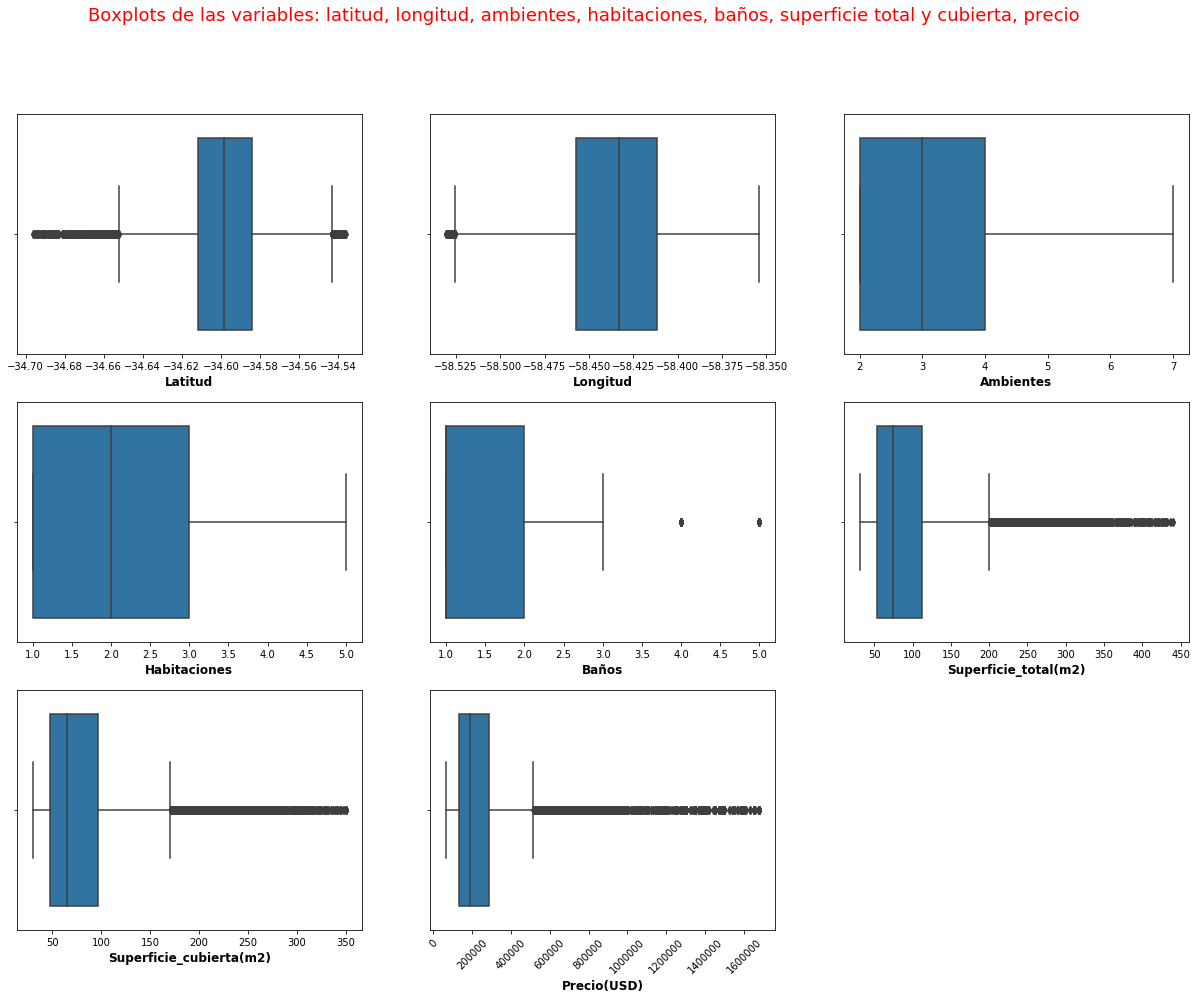

In [18]:
plt.figure(figsize=(21,15))
plt.suptitle("Boxplots de las variables: latitud, longitud, ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")
for idx, i in enumerate(columnas, start = 1):
    plt.subplot(3,3,idx)
    sns.boxplot(x = clean_select[i])
    plt.xlabel(i, fontweight = "black", fontsize = 12)
    if idx == 8:
        plt.xticks(rotation = 45)

In [19]:
print("Tamaño del conjunto de datos filtrado:", clean_select.shape)

Tamaño del conjunto de datos filtrado: (70882, 10)


Se vuelve a revisar los datos faltantes que quedaron

In [20]:
print("Cantidad de valores faltantes por columna:\n", clean_select.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
Latitud                    3616
Longitud                   3616
Barrios                       0
Ambientes                     0
Habitaciones                  0
Baños                       678
Superficie_total(m2)          0
Superficie_cubierta(m2)       0
Precio(USD)                   0
Tipo_propiedad                0
dtype: int64


## Imputación de datos faltantes

Los datos faltantes en Latitud y Longitud son varios pero se pueden completar usando el promedio de las mismas agrupadas según el Barrio

In [21]:
#Creo un Data frame para ver cuantos faltantes hay en cada ubicación (da igual elegir latitud o longitud porque donde falta uno falta el otro)
faltantes = pd.DataFrame()
latitud = clean_select[clean_select["Latitud"].isna()]
faltantes["Faltantes"] = latitud["Barrios"].value_counts()
faltantes["Totales"] = clean_select["Barrios"].value_counts()
faltantes

,Faltantes,Totales
Palermo,921,10955
Belgrano,495,5245
Recoleta,420,4711
Barrio Norte,356,2760
Puerto Madero,252,1406
Caballito,177,5037
Flores,169,1863
Almagro,152,6294
Villa Crespo,113,5426
Balvanera,98,2061


In [22]:
#Completo los faltantes para "lat"
clean_select["Latitud"].fillna(clean_select.groupby("Barrios")["Latitud"].transform('mean'), inplace = True)

In [23]:
#Completo los faltantes para "lon"
clean_select["Longitud"].fillna(clean_select.groupby("Barrios")["Longitud"].transform('mean'), inplace = True)

In [24]:
print("Cantidad de valores faltantes por columna:\n", clean_select.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
Latitud                      0
Longitud                     0
Barrios                      0
Ambientes                    0
Habitaciones                 0
Baños                      678
Superficie_total(m2)         0
Superficie_cubierta(m2)      0
Precio(USD)                  0
Tipo_propiedad               0
dtype: int64


Ahora solo quedan unos pocos datos faltantes para el nro de baños, los cuales los vamos a eliminar, ya que no son muchos y es un valor más dificil de estimar y puede inferir errores innecesarios en nuestro dataset

In [25]:
clean_select = clean_select.dropna()
clean_select.reset_index(drop = True, inplace = True)

In [26]:
print("Tamaño del conjunto de datos filtrado:", clean_select.shape)

Tamaño del conjunto de datos filtrado: (70204, 10)


Revisamos nuevamente como quedaron nuestros datos luego de los filtros realizados

In [28]:
clean_select.describe()

,Latitud,Longitud,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD)
count,70204.000000,70204.000000,70204.000000,70204.000000,70204.000000,70204.000000,70204.000000,7.020400e+04
mean,-34.597578,-58.434456,3.107544,2.030767,1.555495,93.634223,80.929634,2.531718e+05
std,0.022741,0.034914,1.028212,0.913300,0.783783,59.831938,47.704097,2.076056e+05
min,-34.696419,-58.530468,2.000000,1.000000,1.000000,31.000000,30.000000,6.700000e+04
25%,-34.611123,-58.455645,2.000000,1.000000,1.000000,53.000000,48.000000,1.350000e+05
50%,-34.597953,-58.432215,3.000000,2.000000,1.000000,75.000000,66.000000,1.890000e+05
75%,-34.584520,-58.410838,4.000000,3.000000,2.000000,112.000000,97.000000,2.880000e+05
max,-34.535909,-58.353930,7.000000,5.000000,5.000000,440.000000,350.000000,1.680000e+06


Como podemos observar, la dispersión se redujo considerablemente sobre todo en las superficies. Los valores mínimos de "superficie total" y "superficie cubierta" ahora son razonables. Y por último los valores máximos también disminuyeron considerablemente.

## Encoding

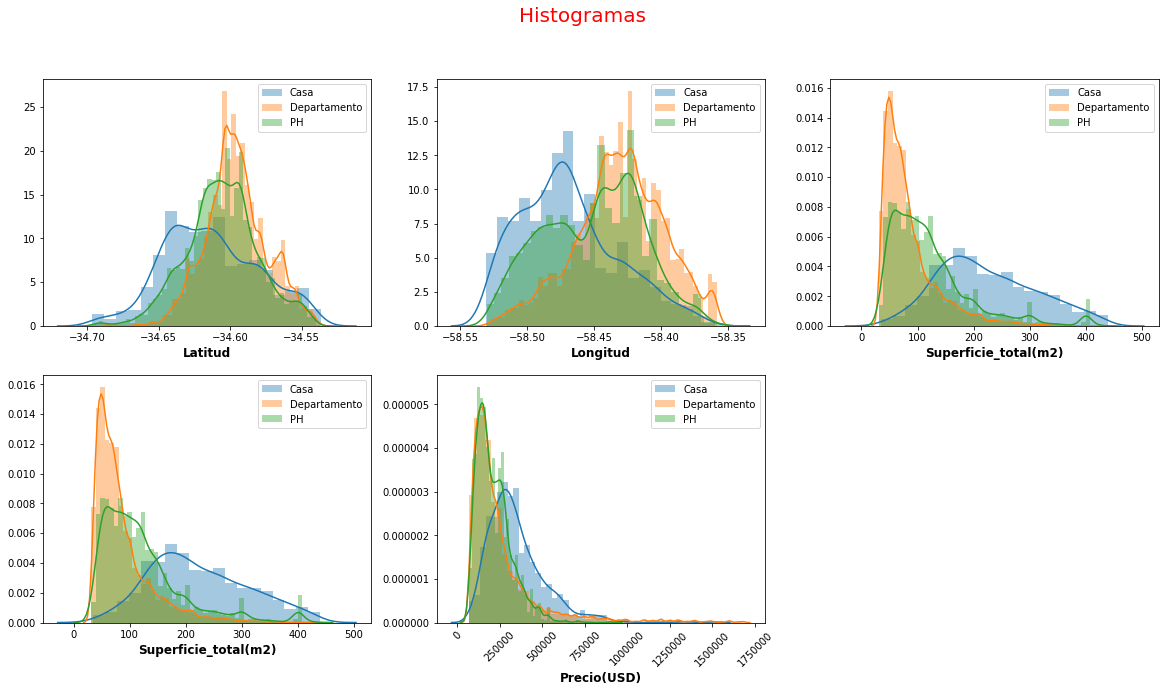

In [29]:
variables = ["Latitud", "Longitud", "Superficie_total(m2)", "Superficie_total(m2)", "Precio(USD)"]
casa = clean_select[clean_select.Tipo_propiedad == "Casa"]
departamento = clean_select[clean_select.Tipo_propiedad == "Departamento"]
ph = clean_select[clean_select.Tipo_propiedad == "PH"]

plt.figure(figsize=(20,10))
plt.suptitle("Histogramas", fontsize = 20, color = "r")
for idx, i in enumerate(variables, start = 1):
    plt.subplot(2,3,idx)
    sns.distplot(casa[i], label = "Casa")
    sns.distplot(departamento[i], label = "Departamento")
    sns.distplot(ph[i], label = "PH")
    plt.xlabel(i, fontweight = "black", fontsize = 12)
    plt.legend()
    if idx == 5:
        plt.xticks(rotation = 45)

Como se puede observar en los gráficos anteriores, los distintos tipos de propiedad tienen dispersiones diferentes, por lo cual es muy probable que sea importante pasarle al modelo el tipo de propiedad, así que se procede a realizar el encoding de esta variable. Además sabemos por conocimiento general que los distintos tipos de propiedad no tienen el mismo valor, una casa por lo general vale más que un departamento del mismo tamaño.

In [30]:
clean_select.reset_index(drop = True, inplace = True)

In [31]:
encoder = OneHotEncoder(sparse=False)

In [32]:
p_type = encoder.fit_transform(clean_select[["Tipo_propiedad"]])

In [33]:
print(encoder.categories_)

[array(['Casa', 'Departamento', 'PH'], dtype=object)]


In [34]:
p_type = pd.DataFrame(data = p_type, columns = ["Casa", "Departamento", "PH"])

In [35]:
new_data = pd.concat([clean_select, p_type], axis = 1)
new_data.head(3)

,Latitud,Longitud,Barrios,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD),Tipo_propiedad,Casa,Departamento,PH
0,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0.0,0.0,1.0
1,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,0.0,1.0
2,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0.0,0.0,1.0


## Nuevas variables predictoras

Se agregaron dos variables nuevas: **"Proporción cubierta"**, generada a partir de la división de la "Superficie cubierta" sobre la "Superficie total", y **"Cantidad de baños por habitación"**, generada a partir de la división del Nro de baños por el Nro de habitaciones.

La idea es ver si nos sirven para resumir en una variable la información de dos o incluso sumar información

In [36]:
#Proporción cubierta
prop_cub = new_data["Superficie_cubierta(m2)"]/new_data["Superficie_total(m2)"]
prop_cub = pd.DataFrame(data = prop_cub, columns = ["Proporcion_cubierta"])
new_data = pd.concat([new_data, prop_cub], axis = 1)

In [37]:
new_data.head(3)

,Latitud,Longitud,Barrios,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD),Tipo_propiedad,Casa,Departamento,PH,Proporcion_cubierta
0,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0.0,0.0,1.0,0.828571
1,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,0.0,1.0,1.000000
2,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0.0,0.0,1.0,0.588235


In [38]:
#Cantidad de baños por habitación
bath_bed = new_data.Baños/new_data.Habitaciones
bath_bed = pd.DataFrame(data = bath_bed, columns = ["Baños/Habitaciones"])
new_data = pd.concat([new_data, bath_bed], axis = 1)
new_data.head(3)

,Latitud,Longitud,Barrios,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD),Tipo_propiedad,Casa,Departamento,PH,Proporcion_cubierta,Baños/Habitaciones
0,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0.0,0.0,1.0,0.828571,2.0
1,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,0.0,1.0,1.000000,1.0
2,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0.0,0.0,1.0,0.588235,1.0


## Escalado de los datos

Se escalan los datos para poder realizar luego una reducción de dimensionalidad (PCA). Es necesario realizar este paso previo debido a que las variables se encuentran en magnitudes muy diferentes y si no las escalamos, toda la variabilidad se las van a llevar las variables con mayor magnitud como las superficies.

Los datos escalados se guardaran en una copia de nuestro data set, ya que para los modelos de árbol de decisión no es necesario el escalado de los datos y vamos a utilizar los datos originales.

In [39]:
scalar = StandardScaler()
col = ["Latitud", "Longitud", "Ambientes", "Habitaciones", "Baños", "Superficie_total(m2)", "Superficie_cubierta(m2)", "Proporcion_cubierta", "Baños/Habitaciones"]
scale_data = new_data

scale_data[col] = scalar.fit_transform(scale_data[col])

In [40]:
scale_data.reset_index(drop = True, inplace = True)
scale_data.head(3)

,Latitud,Longitud,Barrios,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD),Tipo_propiedad,Casa,Departamento,PH,Proporcion_cubierta,Baños/Habitaciones
0,-1.164322,0.640017,Boedo,-1.077162,-1.128626,0.567131,-0.395013,-0.480667,159000.0,PH,0.0,0.0,1.0,-0.516196,3.270586
1,0.176273,0.199972,Palermo,-1.077162,-1.128626,-0.708741,-0.812853,-0.753182,125000.0,PH,0.0,0.0,1.0,0.866518,0.454292
2,0.716040,-0.065826,Palermo,-1.077162,-1.128626,-0.708741,-0.144309,-0.648369,295000.0,PH,0.0,0.0,1.0,-2.454708,0.454292


## Reducción de dimencionalidad (PCA)

Para el PCA utilizamos todas las variables, menos las categóricas, las numéricas obtenidas a partir del encoding y la variable target (Price).

In [42]:
X = scale_data.drop(columns = ["Barrios", "Tipo_propiedad", "Precio(USD)", "Casa", "Departamento", "PH"])

In [43]:
pca = PCA(n_components=4)
X_new = pca.fit_transform(X)

In [44]:
np.round(pca.components_,3)

array([[ 0.004,  0.051,  0.467,  0.458,  0.362,  0.454,  0.464, -0.076,
        -0.11 ],
       [ 0.31 ,  0.075, -0.177, -0.217,  0.475,  0.086,  0.106, -0.005,
         0.759],
       [ 0.149, -0.662, -0.057, -0.052, -0.066,  0.179, -0.06 , -0.703,
         0.002],
       [-0.818,  0.292, -0.101, -0.117,  0.046,  0.145, -0.003, -0.398,
         0.202]])

In [45]:
pca.explained_variance_ratio_

array([0.44234309, 0.16769755, 0.14196432, 0.1117236 ])

Con 4 componentes logramos capturar el 86% de la variabilidad.

In [46]:
principal_comp = pd.DataFrame(data = X_new, columns = ["pca_1", "pca_2", "pca_3", "pca_4"]) 
principal_comp.head()

,pca_1,pca_2,pca_3,pca_4
0,-1.510491,2.789583,-0.188793,2.214485
1,-2.099744,0.358816,-0.648223,-0.246940
2,-1.505545,0.590912,2.055366,0.653244
3,-1.929411,0.366563,-0.369512,-0.328500
4,-1.676693,0.337054,-0.547371,0.032158


In [47]:
scale_data = pd.concat([scale_data, principal_comp], axis = 1)
scale_data.head(3)

,Latitud,Longitud,Barrios,Ambientes,Habitaciones,Baños,Superficie_total(m2),Superficie_cubierta(m2),Precio(USD),Tipo_propiedad,Casa,Departamento,PH,Proporcion_cubierta,Baños/Habitaciones,pca_1,pca_2,pca_3,pca_4
0,-1.164322,0.640017,Boedo,-1.077162,-1.128626,0.567131,-0.395013,-0.480667,159000.0,PH,0.0,0.0,1.0,-0.516196,3.270586,-1.510491,2.789583,-0.188793,2.214485
1,0.176273,0.199972,Palermo,-1.077162,-1.128626,-0.708741,-0.812853,-0.753182,125000.0,PH,0.0,0.0,1.0,0.866518,0.454292,-2.099744,0.358816,-0.648223,-0.246940
2,0.716040,-0.065826,Palermo,-1.077162,-1.128626,-0.708741,-0.144309,-0.648369,295000.0,PH,0.0,0.0,1.0,-2.454708,0.454292,-1.505545,0.590912,2.055366,0.653244


Ahora vamos a realizar un heatmap para poder visualizar mejor el aporte de cada variable a cada componente.

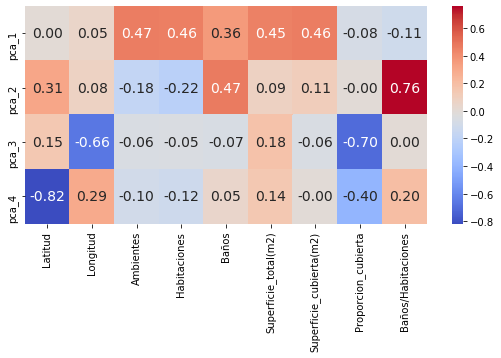

In [48]:
comp = pca.components_
plt.figure(figsize=(9,4))
sns.heatmap(comp, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
           xticklabels= X.columns, 
           yticklabels= principal_comp.columns,
           cmap= 'coolwarm')

plt.show()

## Correlaciones ##

Text(0.5, 1, 'Coeficientes de correlación (Pearson)')

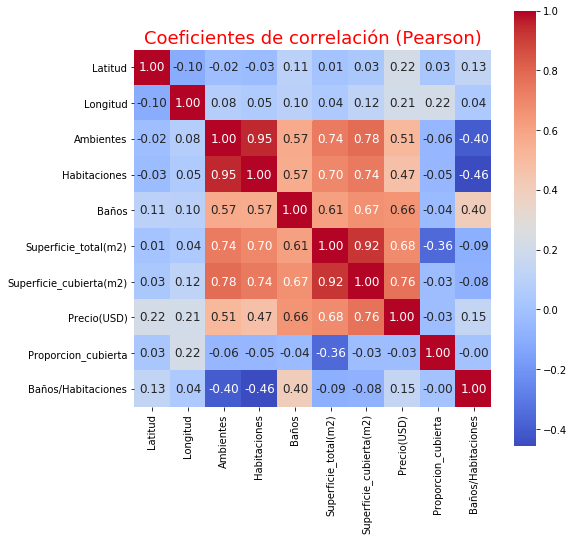

In [49]:
data_corr = new_data.drop(columns = ["Casa", "Departamento", "PH"])
corr = data_corr.corr()

plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "r")

Como ya vimos en el proyecto 1:
* En orden decreciente, las variables que poseen un coeficiente de correlación con la variable "Precio" superior a 0.5 son, "Superfie cubierta", "Superficie total, "Baños", y "Ambientes".
* Las variables "Superficie Total" y "Superficie cubierta", como es de esperarse, están altamente relacionadas entre sí.
* Al igual que las superficies, las variables "Ambientes" y "Habitaciones" también están muy relacionadas entre sí.

A continuación se realizó el mismo análisis pero para cada tipo de propiedad por separado.

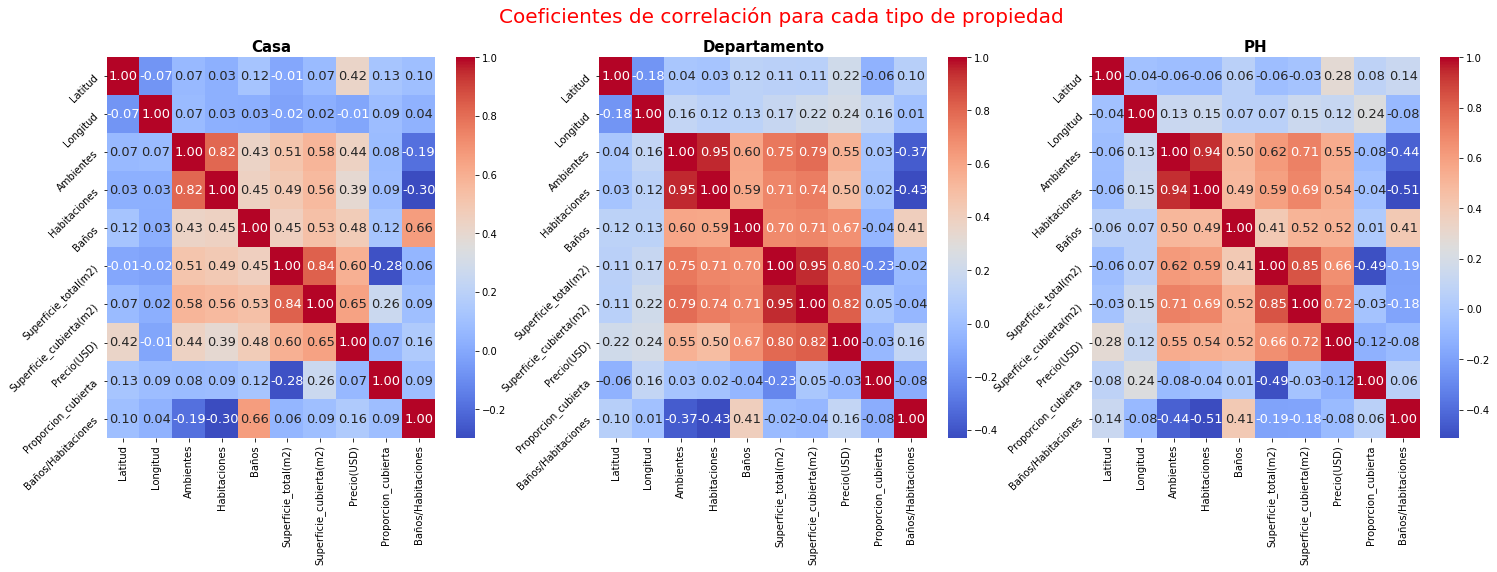

In [50]:
tipos = ["Casa", "Departamento", "PH"]

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada tipo de propiedad", fontsize = 20, color = "r")
for idx, i in enumerate(tipos, start = 1):
    corr = data_corr[data_corr.Tipo_propiedad == i].corr()
    plt.subplot(1,3,idx)
    sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 13}, cmap= 'coolwarm')
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 45)
    plt.title(i, fontweight = "black", fontsize = 15)

Al dividir el análisis por el tipo de propiedad podemos ver que para el caso de los Departamentos y PH se mantienen las mismas relaciones vistas anteriormente. Sin embargo, para las Casas se puede apreciar una considerable disminución en los valores de correlación de la variable "Precio", principalmente para las variables "Ambientes", "Habitaciones" y "Baños", también se puede apreciar un aumento considerable en el coeficiente de correlación para las variables "Precio" y "Latitud".

Finalmente en ningún caso obtuvimos una correlación significativa entre la variable "Precio" y las dos variables que creamos nuevas, sin embargo vamos a utilizarlas para ver si nos aportan algo de información.

## Definición de una función para aplicar y evaluar los modelos ##

Se definió una función para aplicar cada vez que se cree un modelo y se requiera evaluar su desempeño

In [51]:
def Aplicar_modelo(X_train, X_test, y_train, y_test, modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    
    return rmse_train, rmse_test

#### Se genera un nuevo dataset con los filtros utilizados en el proyecto 1 para poder compararlos

Al data set original se le aplican los filtros utilizados en el Proyecto 1 para poder obtener el mismo conjunto de datos y comparar el modelo con los datos nuevos.

In [52]:
seleccion_P1 = propiedades[(propiedades.property_type == "Departamento") | (propiedades.property_type == "PH") | (propiedades.property_type == "Casa")]
seleccion_P1 = seleccion_P1[seleccion_P1.l2 == "Capital Federal"]
seleccion_P1 = seleccion_P1[(15 <= seleccion_P1.surface_total) & (seleccion_P1.surface_total <= 1000)]
seleccion_P1 = seleccion_P1[seleccion_P1.price <= 4000000]
seleccion_P1 = seleccion_P1[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
seleccion_P1 = seleccion_P1.dropna()

In [53]:
print("Tamaño del conjunto de datos filtrado (Proyecto 1):", seleccion_P1.shape)
print("Tamaño del conjunto de datos filtrado (Proyecto 2):", new_data.shape)

Tamaño del conjunto de datos filtrado (Proyecto 1): (76771, 8)
Tamaño del conjunto de datos filtrado (Proyecto 2): (70204, 15)


#### Se generan distintas X para comparar su rendimiento

In [54]:
# Proyecto 1
X1 = seleccion_P1[["lat", "lon", "surface_total", "surface_covered"]]

# Las variables utilizadas en el proyecto 1 sin tratar, sólo con la eliminación de outliers
X2 = clean_select[["Latitud", "Longitud", "Superficie_total(m2)", "Superficie_cubierta(m2)"]]

# Mis nuevas variables tratadas 
X3 = new_data[["Latitud", "Longitud", "Superficie_cubierta(m2)", "Casa", "Departamento", "PH", "Baños/Habitaciones", "Proporcion_cubierta"]]

# Variables del proyecto 1 más encoding
X4 = new_data[["Latitud", "Longitud", "Superficie_cubierta(m2)", "Superficie_total(m2)", "Casa", "Departamento", "PH"]]

# Las variables obtenidas por PCA más las obtenidas en el Encoding
X5 = scale_data[["pca_1", "pca_2", "pca_3", "pca_4", "Casa", "Departamento", "PH"]]

# Las variables obtenidas en el PCA
X6 = scale_data[["pca_1", "pca_2", "pca_3", "pca_4"]]

#Las y para cada caso
y1 = seleccion_P1["price"] #X1
y2 = clean_select["Precio(USD)"] #X2
y = new_data["Precio(USD)"] #X3-4 
y_scale = scale_data["Precio(USD)"] #X5-6

#### Se realiza el Train-Test split para cada conjunto

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.3, random_state = 42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.3, random_state = 42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y_scale, test_size = 0.3, random_state = 42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y_scale, test_size = 0.3, random_state = 42)

#### Se crea un modelo para cada conjunto

Se utiliza el mismo modelo que se obtuvo en el proyecto 1. Un árbol de decisión con profundidad máxima 10.

In [56]:
tree_model1 = DecisionTreeRegressor(max_depth = 10)
tree_model2 = DecisionTreeRegressor(max_depth = 10)
tree_model3 = DecisionTreeRegressor(max_depth = 10)
tree_model4 = DecisionTreeRegressor(max_depth = 10)
tree_model5 = DecisionTreeRegressor(max_depth = 10)
tree_model6 = DecisionTreeRegressor(max_depth = 10)

### Modelo 1 (Proyecto 1)

Raíz del error cuadrático medio en Train: 80049.47995697077
Raíz del error cuadrático medio en Test: 99221.23772900738


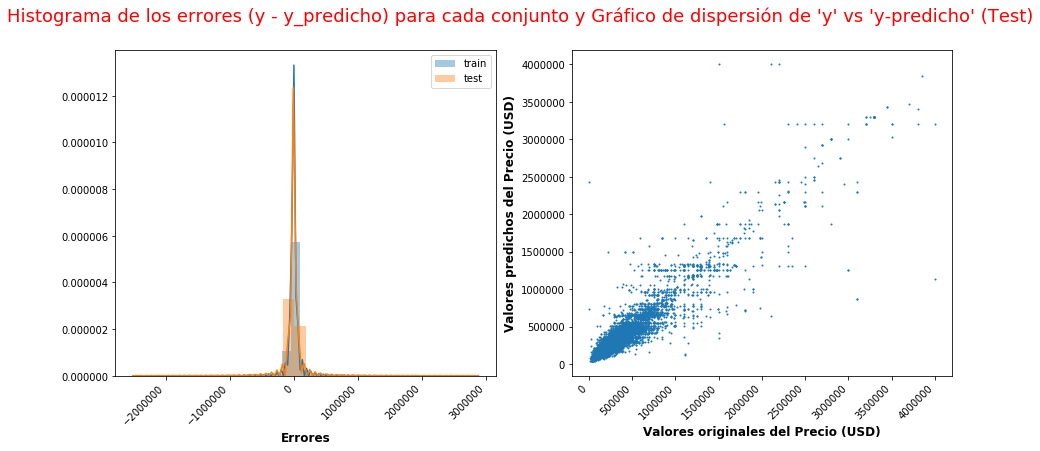

In [57]:
rmse_train1, rmse_test1 = Aplicar_modelo(X1_train, X1_test, y1_train, y1_test, tree_model1)

### Modelo 2 (Variables utilizadas en el Proyecto 1 con la nueva eliminación de outliers)

Variables "lat", "lon", "superficie total" y "superficie cubierta" (las mismas utilizadas en el proyecto 1), sin ninguna transformación pero con la eliminación de ouliers utilizada en este proyecto.

Raíz del error cuadrático medio en Train: 69476.66956552594
Raíz del error cuadrático medio en Test: 79173.21994605867


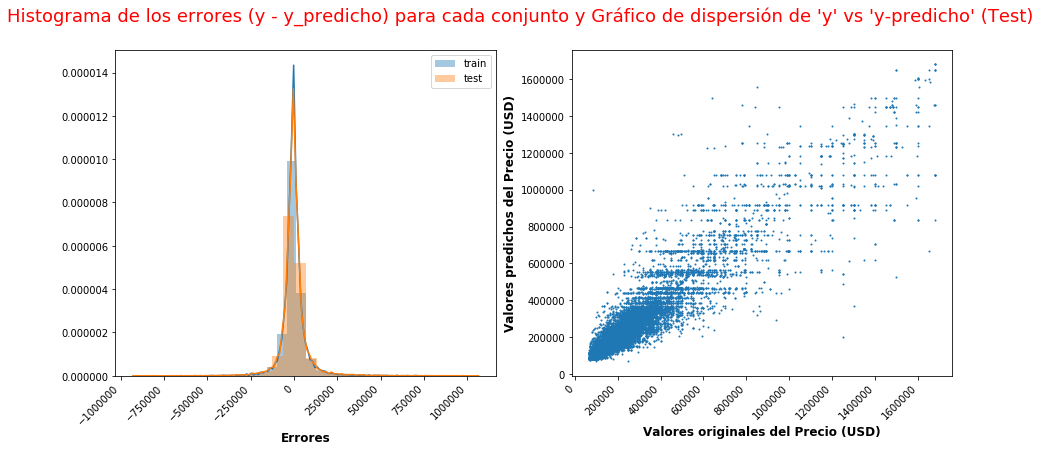

In [58]:
rmse_train2, rmse_test2 = Aplicar_modelo(X2_train, X2_test, y2_train, y2_test, tree_model2)

### Modelo 3 (Nuevas variables tratadas)

Variables "latitud", "longitud", "superficie cubierta", "Casa", "Departamento", "PH", "Baños/Habitación", y "Proporción cubierta".

Raíz del error cuadrático medio en Train: 65631.64578074584
Raíz del error cuadrático medio en Test: 75573.07705997328


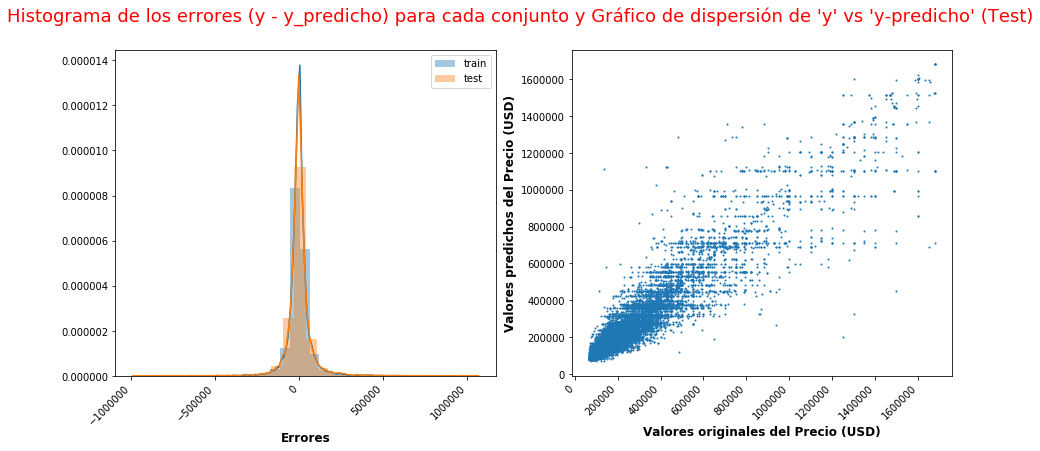

In [59]:
rmse_train3, rmse_test3 = Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, tree_model3)

### Modelo 4 (Variables proyecto 1 + Encoding)

Las mismas variables utilizadas en el proyecto 1 (con los nuevos filtros), más las obtenidas por Encoding (Sin las dos creadas)

Raíz del error cuadrático medio en Train: 67084.34801816077
Raíz del error cuadrático medio en Test: 77241.84225142344


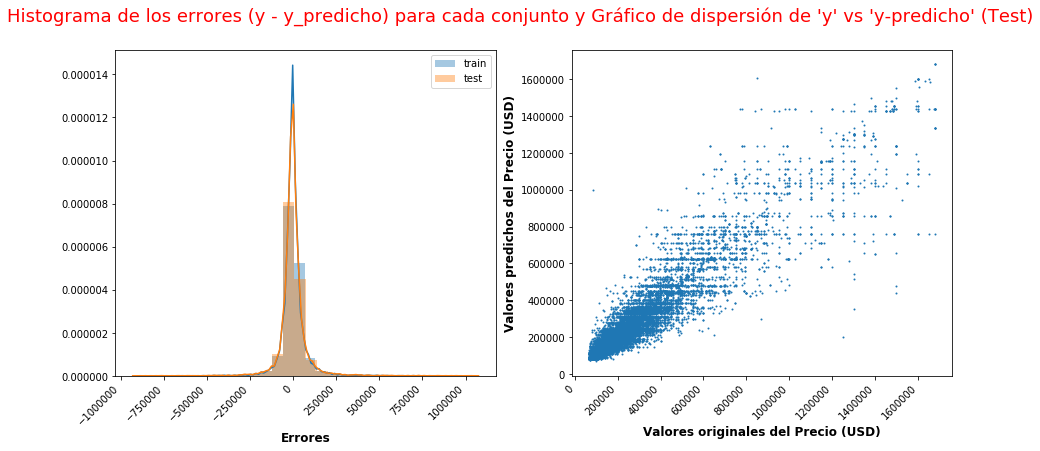

In [60]:
rmse_train4, rmse_test4 = Aplicar_modelo(X4_train, X4_test, y4_train, y4_test, tree_model4)

### Modelo 5 (PCA + Encoding)

Variables obtenidas por PCA, más las obtenidas a partir del Encoding (no se incluyeron en el modelo de PCA).

Raíz del error cuadrático medio en Train: 79669.35278380313
Raíz del error cuadrático medio en Test: 91514.63576163829


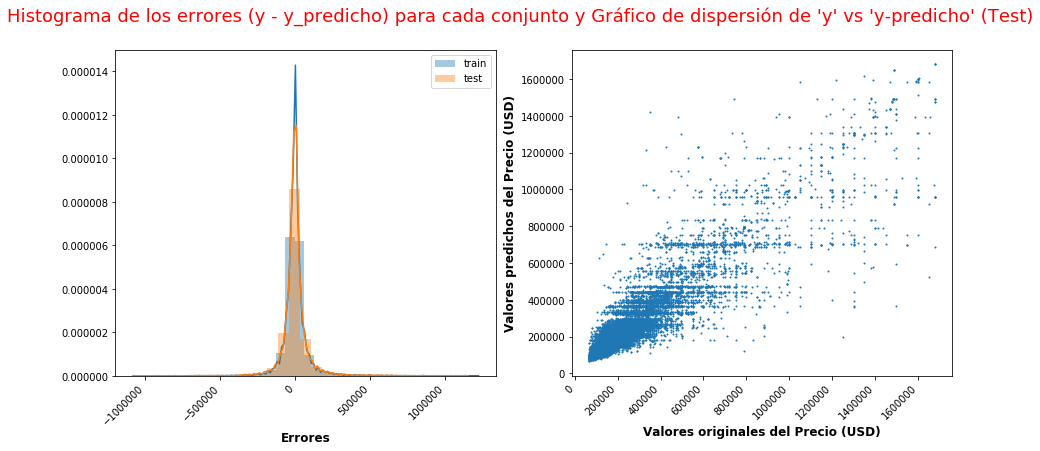

In [61]:
rmse_train5, rmse_test5 = Aplicar_modelo(X5_train, X5_test, y5_train, y5_test, tree_model5)

### Modelo 6 (PCA sin Encoding)

Sólo las variables obtenidas por PCA

Raíz del error cuadrático medio en Train: 78359.22961716323
Raíz del error cuadrático medio en Test: 91451.71839727015


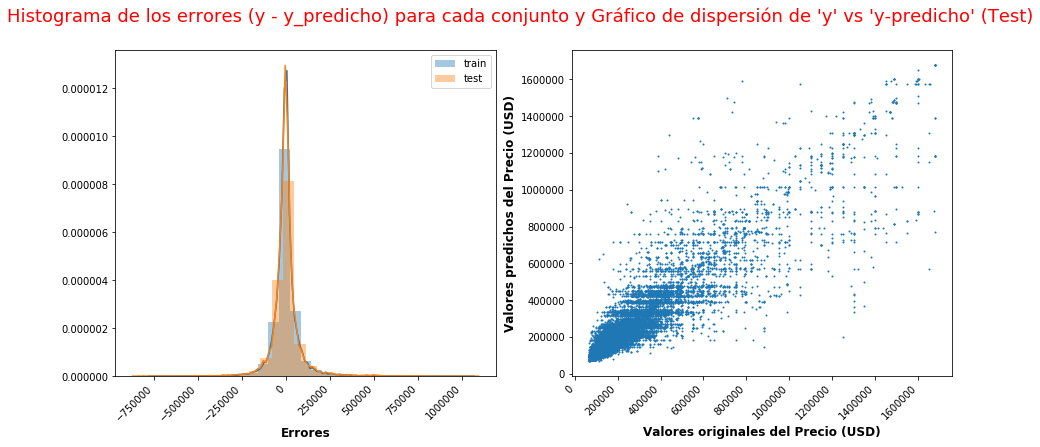

In [62]:
rmse_train6, rmse_test6 = Aplicar_modelo(X6_train, X6_test, y6_train, y6_test, tree_model6)

In [63]:
resumen_tree = {"Modelo":["Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión"], 
           "Variables":["Proyecto 1", "Proyecto 1 con nuevo filtrado", "Nuevas tratadas", "Nuevas sin creadas", "PCA + Encoding", "PCA"],
           "Nro de Variables": [X1.columns.shape[0], X2.columns.shape[0], X3.columns.shape[0], X4.columns.shape[0], X5.columns.shape[0], X6.columns.shape[0]], 
           "RMSE (test)":[np.round(rmse_test1,2), np.round(rmse_test2,2), np.round(rmse_test3,2), np.round(rmse_test4,2), np.round(rmse_test5,2), np.round(rmse_test6,2)], 
           "RMSE (train)":[np.round(rmse_train1,2), np.round(rmse_train2,2), np.round(rmse_train3,2), np.round(rmse_train4,2), np.round(rmse_train5,2), np.round(rmse_train6,2)]}
pd.DataFrame(resumen_tree)

,Modelo,Variables,Nro de Variables,RMSE (test),RMSE (train)
0,Árbol de decisión,Proyecto 1,4,99221.24,80049.48
1,Árbol de decisión,Proyecto 1 con nuevo filtrado,4,79173.22,69476.67
2,Árbol de decisión,Nuevas tratadas,8,75573.08,65631.65
3,Árbol de decisión,Nuevas sin creadas,7,77241.84,67084.35
4,Árbol de decisión,PCA + Encoding,7,91514.64,79669.35
5,Árbol de decisión,PCA,4,91451.72,78359.23


Como se puede apreciar en la tabla anterior, se logró una reducción  considerable del RMSE, mayormente por el nuevo filtrado de outliers, pero luego con las transformaciones y variables nuevas se logró reducir un poco más aún el error. También se puede ver que las variables obtenidas por PCA no lograron un buen resultado.

A continuación se consultó la importancia de las variables en el nuevo mejor modelo y en el del proyecto 1.

([<matplotlib.axis.XTick at 0x1d82ba19ac0>,
 <a list of 4 Text xticklabel objects>)

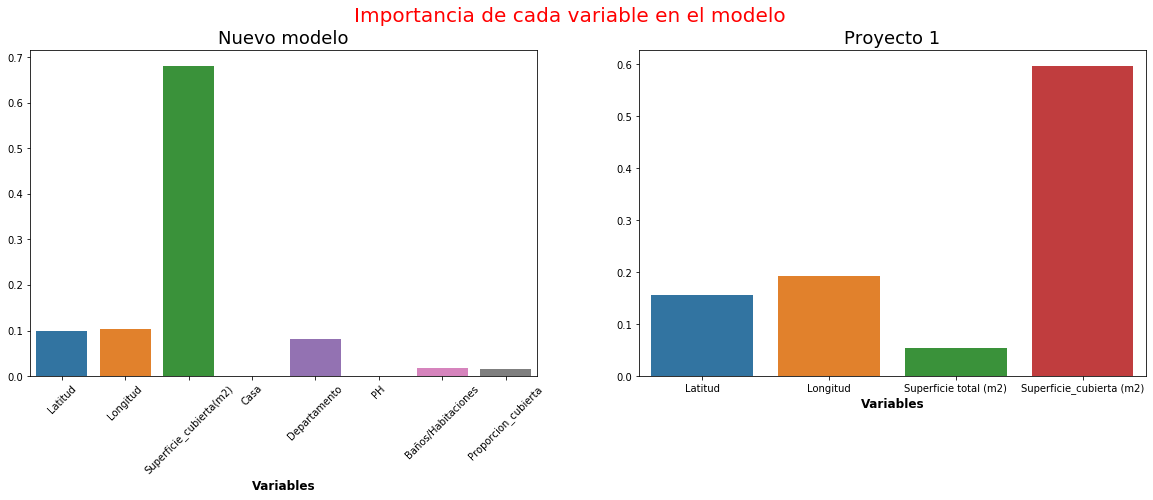

In [64]:
importances3 = tree_model3.feature_importances_
columns3 = X3.columns
importances1 = tree_model1.feature_importances_
columns1 = X1.columns

plt.figure(figsize = (20, 6))
plt.suptitle("Importancia de cada variable en el modelo", fontsize = 20, color = "r")
plt.subplot(1,2,1)
sns.barplot(columns3, importances3)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Nuevo modelo", fontsize = 18)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.barplot(columns1, importances1)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Proyecto 1", fontsize = 18)
plt.xticks(np.arange(4), ("Latitud", "Longitud", "Superficie total (m2)", "Superficie_cubierta (m2)"))
#plt.show()

La variable más importante sigue siendo la superficie cubierta.

La poca importancia vista para las variables "Casa" y "PH" puede deberse a que la mayoría de las propiedades son "Departamentos"

In [65]:
print("Cantidad de propiedades por tipo:\n", new_data["Tipo_propiedad"].value_counts(), sep = "")

Cantidad de propiedades por tipo:
Departamento    59778
PH               8842
Casa             1584
Name: Tipo_propiedad, dtype: int64


In [66]:
print("Cantidad de Departamentos en el train:\n", X3_train["Departamento"].value_counts(), sep = "")

Cantidad de Departamentos en el train:
1.0    41845
0.0     7297
Name: Departamento, dtype: int64


### Vecinos más cercanos

A pesar de que no fue el mejor modelo obtenido en el proyecto 1, se probó también utilizar nuestras nuevas variables con el modelo de vecinos más cercanos ya que al tener los datos escalados el rendimiento probablemente mejore. 

In [67]:
X_knn = scale_data[["Latitud", "Longitud", "Superficie_cubierta(m2)", "Casa", "Departamento", "PH", "Baños/Habitaciones", "Proporcion_cubierta"]]
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_scale, test_size = 0.3, random_state = 42)

Raíz del error cuadrático medio en Train: 45346.41769717135
Raíz del error cuadrático medio en Test: 66974.56588426746


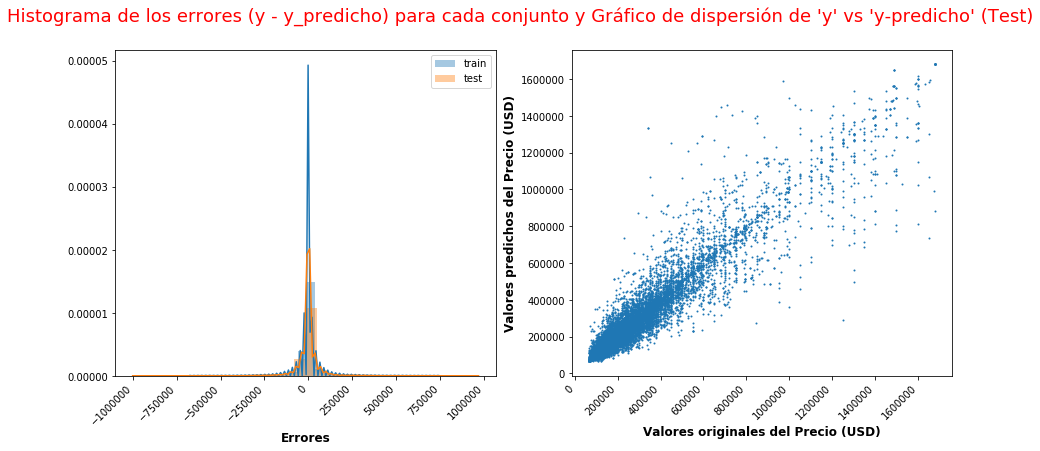

In [68]:
KNN_model = KNeighborsRegressor(n_neighbors = 3)
rmse_train_KNN, rmse_test_KNN = Aplicar_modelo(X_knn_train, X_knn_test, y_knn_train, y_knn_test, KNN_model)

In [69]:
resumen_modelos = {"Modelo":["Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos"], 
           "Variables":["Proyecto 1", "Nuevas tratadas", "Nuevas tratadas y escaladas"],
           "Nro de Variables": [X1.columns.shape[0], X3.columns.shape[0], X_knn.columns.shape[0]], 
           "RMSE (test)":[np.round(rmse_test1,2), np.round(rmse_test3,2), np.round(rmse_test_KNN,2)], 
           "RMSE (train)":[np.round(rmse_train1,2), np.round(rmse_train3,2), np.round(rmse_train_KNN,2)]}
pd.DataFrame(resumen_modelos)

,Modelo,Variables,Nro de Variables,RMSE (test),RMSE (train)
0,Árbol de decisión,Proyecto 1,4,99221.24,80049.48
1,Árbol de decisión,Nuevas tratadas,8,75573.08,65631.65
2,Vecinos más cercanos,Nuevas tratadas y escaladas,8,66974.57,45346.42


Como se puede observar, el rendimiento obtenido por el modelo de vecinos más cercanos mejoró mucho, siendo incluso mejor que el obtenido por el modelo de árbol de decisión.

# Modelos Avanzados

A continuación se probaron 4 modelos avanzados: Bagging y AdaBoost con "vecinos más cercanos" como estimador base, y XGBoost y RandomForest para árboles de decisión.

## Bagging

In [70]:
Bagging_model = BaggingRegressor(base_estimator = KNeighborsRegressor(n_jobs = -1), n_jobs = -1, random_state = 42)

In [71]:
bagg_scores = cross_validate(Bagging_model, X_knn, y_scale, cv=5, n_jobs = -1)

In [72]:
print(bagg_scores)

{'fit_time': array([21.89399743, 28.33853245, 26.10709691, 20.45581198, 30.23444843]), 'score_time': array([4.85271764, 2.977247  , 3.66817379, 4.78784823, 1.98643851]), 'test_score': array([0.86604119, 0.8943933 , 0.88117594, 0.8874162 , 0.89866652])}


#### Se aplica con sus hiper-parámetros por defecto

Raíz del error cuadrático medio en Train: 54715.09083924918
Raíz del error cuadrático medio en Test: 68634.59947430524


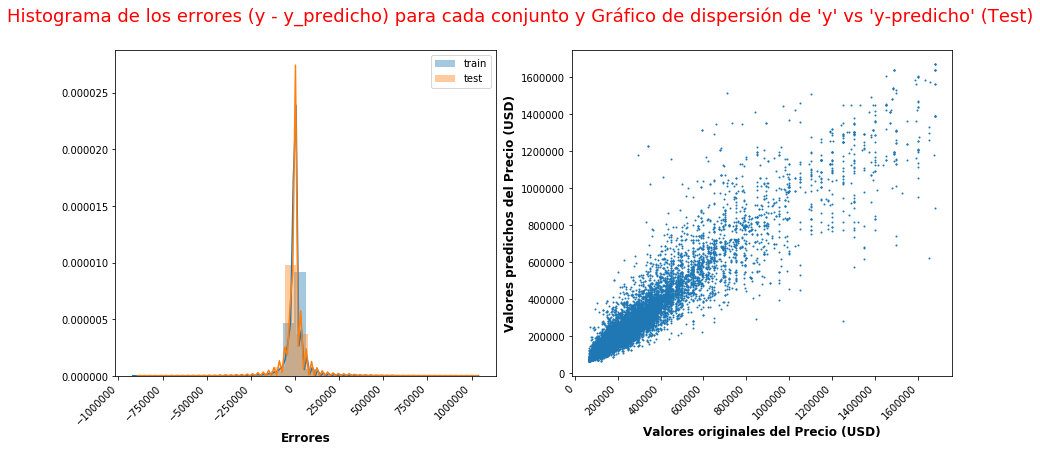

In [73]:
rmse_train_Bag, rmse_test_Bag = Aplicar_modelo(X_knn_train, X_knn_test, y_knn_train, y_knn_test, Bagging_model)

#### Optimización de hiper-parámetros con RandomizedSearch

Los parámetros a optimizar fueron: 

Estimador base: vecinos más cercanos con distintos números de vecinos, los valores seleccionados fueron bajos ya que la idea del Bagging es utilizar modelos sobreajustados.

Número de estimadores: Se dejaron valores no muy altos porque se probó con números más altos pero el costo computacional fue muy grande y no mejoró el rendimiento.

Máximo de muestras: Se probó con distintas proporciones (0.5, 0.75, 1.0)

In [74]:
parameters = {'base_estimator':[KNeighborsRegressor(n_jobs = -1), KNeighborsRegressor(n_neighbors = 3, n_jobs = -1), KNeighborsRegressor(n_neighbors = 5, n_jobs = -1)],
              'n_estimators':[30, 50, 70],
              'max_samples':[0.5, 0.75, 1.0]}

In [75]:
Bagging_model2 = RandomizedSearchCV(Bagging_model, parameters, cv = 5, random_state = 42, n_jobs = -1)

Raíz del error cuadrático medio en Train: 44217.93057265712
Raíz del error cuadrático medio en Test: 64622.79123143994


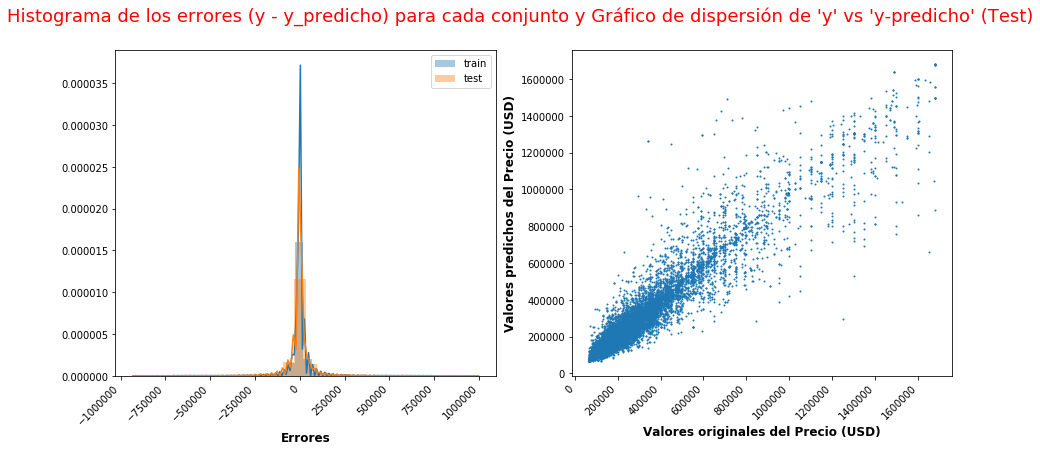

In [74]:
rmse_train_Bag2, rmse_test_Bag2 = Aplicar_modelo(X_knn_train, X_knn_test, y_knn_train, y_knn_test, Bagging_model2)

In [75]:
print("Mejores parametros: "+str(Bagging_model2.best_params_))

Mejores parametros: {'n_estimators': 70, 'max_samples': 1.0, 'base_estimator': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')}


## AdaBoost

In [76]:
Boost_model = AdaBoostRegressor(base_estimator = KNeighborsRegressor(n_jobs = -1), random_state = 42)

In [77]:
boost_scores = cross_validate(Boost_model, X_knn, y_scale, cv=5, n_jobs = -1)

In [78]:
print(boost_scores)

{'fit_time': array([595.96986675, 599.30394149, 605.21324944, 554.36383653,
       510.1542995 ]), 'score_time': array([15.92790484, 16.77142191, 15.85224032, 11.69625974, 17.08615899]), 'test_score': array([0.8709901 , 0.90094388, 0.8876819 , 0.88318702, 0.91195912])}


#### Se aplica con sus hiper-parámetros por defecto

Raíz del error cuadrático medio en Train: 41673.24545277198
Raíz del error cuadrático medio en Test: 66557.2478959207


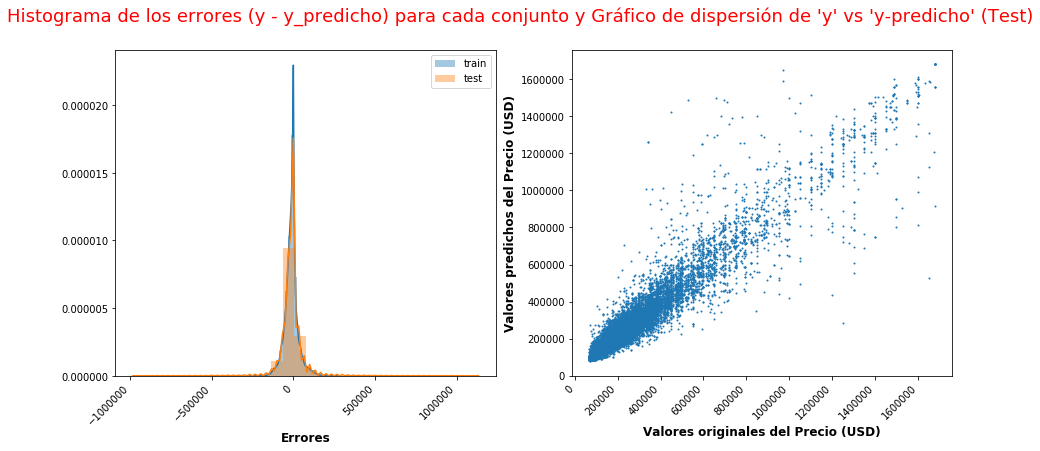

In [79]:
rmse_train_Bost, rmse_test_Bost = Aplicar_modelo(X_knn_train, X_knn_test, y_knn_train, y_knn_test, Boost_model)

#### Optimización de hiper-parámetros con RandomizedSearch

Los parámetros a optimizar fueron: 

Estimador base: vecinos más cercanos con distintos números de vecinos, los valores seleccionados fueron más altos que en Bagging ya que la idea del Boosting es utilizar modelos subjustados.

Número de estimadores: Se dejaron valores no muy altos porque se probó con números más altos pero el costo computacional fue muy grande y no mejoró el rendimiento.

Tasa de aprendizaje: Se probó con distintos valores (0.2, 0.5, 0.75, 1.0)

In [80]:
parameters = {'base_estimator':[KNeighborsRegressor(n_jobs = -1, n_neighbors = 5), KNeighborsRegressor(n_neighbors = 10, n_jobs = -1), KNeighborsRegressor(n_neighbors = 20, n_jobs = -1)],
              'n_estimators':[30, 50, 70],
              'learning_rate':[0.2, 0.5, 0.75, 1.0]}

In [81]:
Boost_model2 = RandomizedSearchCV(Boost_model, parameters, cv = 5, random_state = 42, n_jobs = -1)

Raíz del error cuadrático medio en Train: 42718.593094169686
Raíz del error cuadrático medio en Test: 65493.20678000875


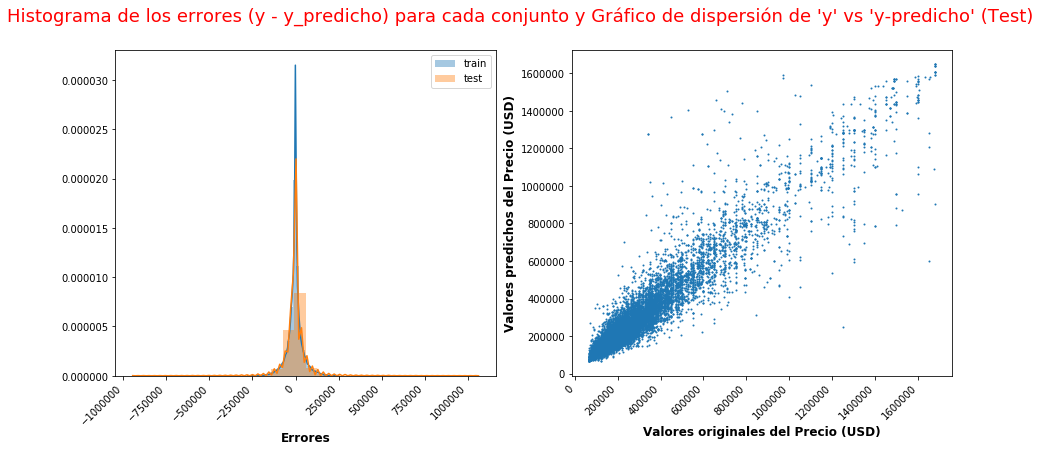

In [82]:
rmse_train_Bost2, rmse_test_Bost2 = Aplicar_modelo(X_knn_train, X_knn_test, y_knn_train, y_knn_test, Boost_model2)

In [83]:
print("Mejores parametros: "+str(Boost_model2.best_params_))

Mejores parametros: {'n_estimators': 30, 'learning_rate': 0.2, 'base_estimator': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                    weights='uniform')}


In [84]:
resumen_knn =  {"Modelo":["Vecinos más cercanos", "Bagging", "AdaBoost"], 
           "Nro de Variables": [X_knn.columns.shape[0], X_knn.columns.shape[0], X_knn.columns.shape[0]], 
           "Nro de Vecinos":[KNN_model.n_neighbors, Bagging_model2.best_params_["base_estimator"].n_neighbors, Boost_model2.best_params_["base_estimator"].n_neighbors],
           "RMSE (test)":[np.round(rmse_test_KNN,2), np.round(rmse_test_Bag2,2), np.round(rmse_test_Bost2,2)], 
           "RMSE (train)":[np.round(rmse_train_KNN,2), np.round(rmse_train_Bag2,2), np.round(rmse_train_Bost2,2)]}
pd.DataFrame(resumen_knn)

,Modelo,Nro de Variables,Nro de Vecinos,RMSE (test),RMSE (train)
0,Vecinos más cercanos,8,3,66974.57,45346.42
1,Bagging,8,3,64622.79,44217.93
2,AdaBoost,8,10,65493.21,42718.59


No se obtuvo una gran mejora con los modelos avanzados respecto al modelo básico de vecinos más cercanos.

## XGBoost

In [85]:
xgb_reg = xgb.XGBRegressor(random_state = 42, n_jobs = -1)

In [86]:
xgb_scores = cross_validate(xgb_reg, X3, y, cv=5, n_jobs = -1)

In [87]:
print(xgb_scores)

{'fit_time': array([7.58924866, 7.24744582, 7.5022974 , 8.0569768 , 7.8910737 ]), 'score_time': array([0.07795501, 0.07495666, 0.07995367, 0.06596255, 0.06696081]), 'test_score': array([0.90076091, 0.91629887, 0.90486665, 0.91236238, 0.91294161])}


#### Se aplica con sus hiper-parámetros por defecto

Raíz del error cuadrático medio en Train: 48008.23096183632
Raíz del error cuadrático medio en Test: 60720.6095411261


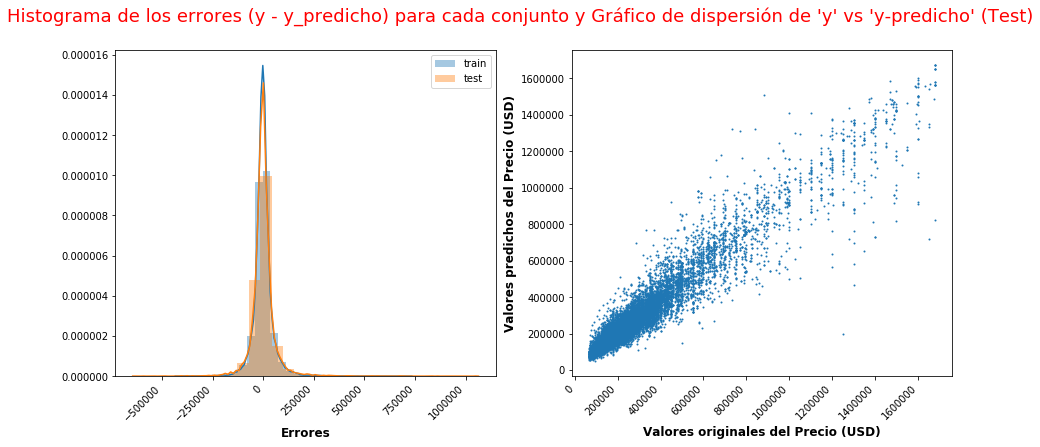

In [88]:
rmse_trainXGB, rmse_testXGB = Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, xgb_reg)

Como se puede ver en los valores de RMSE, ya con sus valores por defecto, el rendimiento de este modelo es mucho mejor que el árbol de decisión aplicado anteriormente y que los modelos de Bagging y Boosting utilizados anteriormente con el estimador base "vecinos más cercanos".

#### Optimización de hiper-parámetros con RandomizedSearch

Los parámetros a optimizar fueron: 

Número de estimadores: Dado el mejor rendimiento computacional de este modelo, se pudieron probar valores más elevados (Por defecto ya utiliza 100).

Profundidad máxima: Distintos valores de profundidad máxima para los estimadores base (árboles de decisión), los valores seleccionados fueron bajos ya que la idea del Boosting es utilizar modelos subjustados.

Tasa de aprendizaje: Se probó con distintos valores (0.25, 0.5, 0.75, 1.0)

In [89]:
parameters = {'n_estimators':[150, 200, 250, 300],
              'max_depth':[5, 10, 15],
              'learning_rate':[0.25, 0.5, 0.75, 1.0]}

In [90]:
XGBoost_model = RandomizedSearchCV(xgb_reg, parameters, cv=5, random_state = 42, n_jobs = -1)

Raíz del error cuadrático medio en Train: 20226.26261422191
Raíz del error cuadrático medio en Test: 51296.83293662128


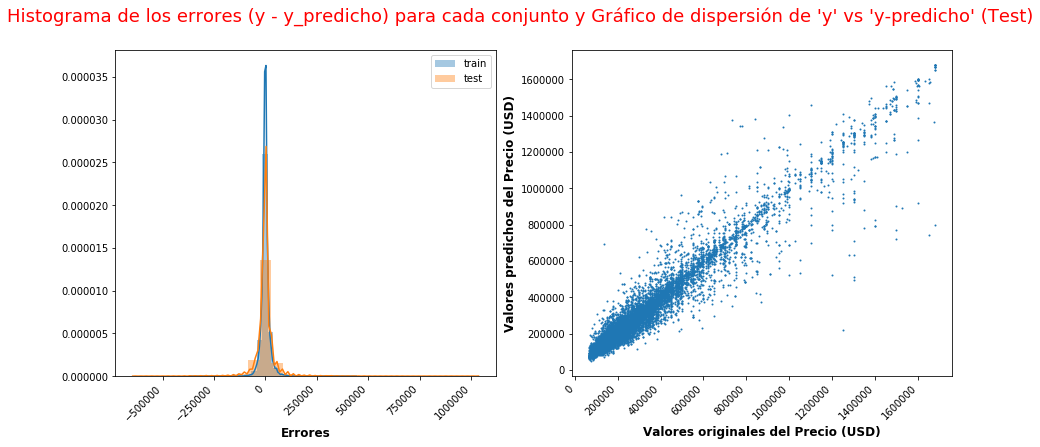

In [91]:
rmse_trainXGB2, rmse_testXGB2 = Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, XGBoost_model)

In [92]:
print("Mejores parametros: "+str(XGBoost_model.best_params_))

Mejores parametros: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.25}


In [93]:
resumen_XGB = {"Modelo":["XGBoost", "XGBoost Optimizado"], 
           "Número de estimadores":[xgb_reg.n_estimators, XGBoost_model.best_estimator_.n_estimators],
           "Profundidad máxima":[6, XGBoost_model.best_params_["max_depth"]],
           "Learning rate":[0.3, XGBoost_model.best_params_["learning_rate"]],
           "Cantidad de Variables": [X3.columns.shape[0], X3.columns.shape[0]], 
           "RMSE (test)":[np.round(rmse_testXGB,2), np.round(rmse_testXGB2,2)],
           "RMSE (train)":[np.round(rmse_trainXGB,2), np.round(rmse_trainXGB2,2)]}
pd.DataFrame(resumen_XGB)

,Modelo,Número de estimadores,Profundidad máxima,Learning rate,Cantidad de Variables,RMSE (test),RMSE (train)
0,XGBoost,100,6,0.30,8,60720.61,48008.23
1,XGBoost Optimizado,150,10,0.25,8,51296.83,20226.26


## Random Forest

In [94]:
RandFor = RandomForestRegressor(n_jobs = -1, random_state = 42)

In [95]:
rand_scores = cross_validate(RandFor, X3, y, cv=5, n_jobs = -1)

In [96]:
print(rand_scores)

{'fit_time': array([19.82860112, 17.91770339, 19.70167422, 17.99465799, 19.56275463]), 'score_time': array([0.11493468, 1.67703557, 0.1179328 , 1.59508252, 0.13692141]), 'test_score': array([0.92414125, 0.93864561, 0.92822921, 0.93141457, 0.93767852])}


#### Se aplica con sus hiper-parámetros por defecto

Raíz del error cuadrático medio en Train: 20863.809047731374
Raíz del error cuadrático medio en Test: 52915.484114908984


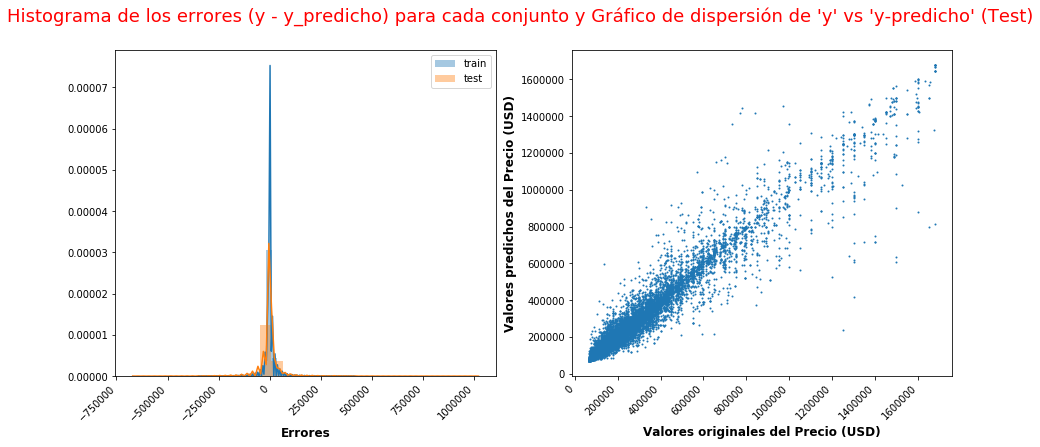

In [97]:
rmse_train_RandFor, rmse_test_RandFor = Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, RandFor)

#### Optimización de hiper-parámetros con RandomizedSearch

Los parámetros a optimizar fueron: 

Número de estimadores: Al igual que para XGBoost se probaron valores altos (superiores al valor por defecto, 100).

Profundidad máxima: Distintos valores de profundidad máxima para los estimadores base (árboles de decisión), los valores seleccionados fueron altos ya que RandomForest utiliza Bagging y la idea del mismo es utilizar modelos sobreajustados.

Disminución mínima de la impureza: Se probó con distintos valores (0.05, 0.1, 0.3, 0.5)

In [98]:
params = {'n_estimators':[150, 200, 250, 300], 
          'max_depth':[100, 200, 300, 500],
          'min_impurity_decrease':[0.05, 0.1, 0.3, 0.5]}

In [99]:
RandForest_model = RandomizedSearchCV(RandFor, params, cv=5, random_state = 42, n_jobs = -1)

Raíz del error cuadrático medio en Train: 20627.390273363002
Raíz del error cuadrático medio en Test: 52629.91433901199


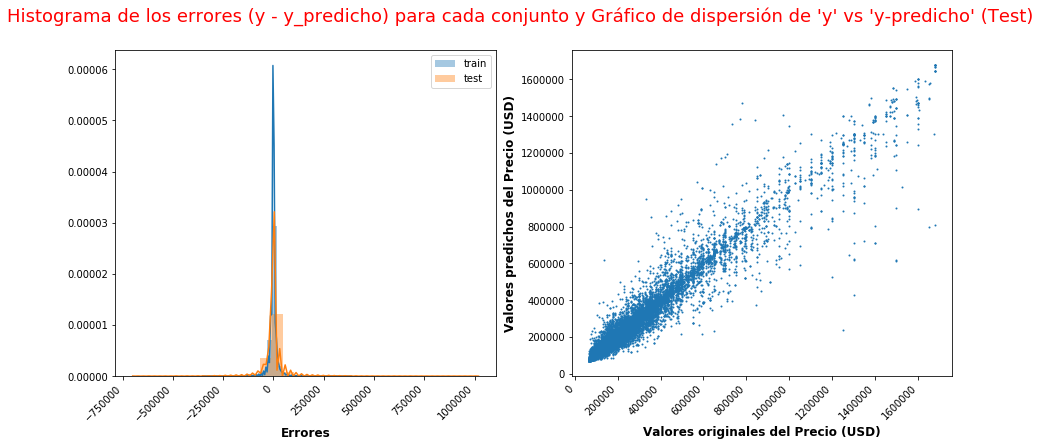

In [100]:
rmse_train_RandFor2, rmse_test_RandFor2 = Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, RandForest_model)

In [101]:
print("Mejores parametros: "+str(RandForest_model.best_params_))

Mejores parametros: {'n_estimators': 250, 'min_impurity_decrease': 0.3, 'max_depth': 500}


In [102]:
resumen_RandForest = {"Modelo":["Random Forest", "Random Forest Optimizado"], 
           "Número de estimadores":[RandFor.n_estimators, RandForest_model.best_estimator_.n_estimators],
           "Profundidad máxima":["None", RandForest_model.best_params_["max_depth"]],
           "Cantidad de Variables": [X3.columns.shape[0], X3.columns.shape[0]], 
           "RMSE (test)":[np.round(rmse_test_RandFor,2), np.round(rmse_test_RandFor2,2)],
           "RMSE (train)":[np.round(rmse_train_RandFor,2), np.round(rmse_train_RandFor2,2)]}
pd.DataFrame(resumen_RandForest)

,Modelo,Número de estimadores,Profundidad máxima,Cantidad de Variables,RMSE (test),RMSE (train)
0,Random Forest,100,None,8,52915.48,20863.81
1,Random Forest Optimizado,250,500,8,52629.91,20627.39


## Resumen y conclusiones

Finalmente, luego de todos los resultados obtenidos, podemos concluir que el mejor modelo obtenido es el XGBoost (optimizado a través de RandomizedSearch), con el cual se obtuvo un RMSE en Test de ~ 51000. Se podría considerar también el modelo RandomForest ya que tuvo un rendimiento similar (~ 52000), sin embargo este modelo tiene un costo computacional mucho mayor que el modelo XGBoost, por lo cual nos quedaremos con este último como el modelo elegido.

Algo a destacar son los resultados obtenidos con los modelos Bagging y AdaBoost, ya que luego de ver el gran rendimiento del modelo sencillo de Vecinos más cercanos en comparación con los de Árboles de decisión, se esperaba obtener muy buenos resultados con los modelos de ensamble (Bagging y AdaBoost), sin embargo no fue así. Los RMSE obtenidos con estos modelos no mejoraron mucho respecto al modelo sencillo y fueron bastante peor que los modelos XGBoost y RandomForest.

A continuación se deja un resumen de los resultados obtenidos con todos los modelos, ordenados según el RMSE en Test de forma creciente.

In [103]:
resumen = {}

In [104]:
resumen["Modelo"] = resumen_modelos["Modelo"] + resumen_XGB["Modelo"] + resumen_RandForest["Modelo"] + resumen_knn["Modelo"][1:]
resumen["Variables"] = resumen_modelos["Variables"] + ["Nuevas Tratadas"] * 6
resumen["RMSE (test)"] = resumen_modelos["RMSE (test)"] + resumen_XGB["RMSE (test)"] + resumen_RandForest["RMSE (test)"] + resumen_knn["RMSE (test)"][1:]
resumen["RMSE (train)"] = resumen_modelos["RMSE (train)"] + resumen_XGB["RMSE (train)"] + resumen_RandForest["RMSE (train)"] + resumen_knn["RMSE (train)"][1:]

In [105]:
resumen = pd.DataFrame(resumen)
resumen.sort_values(by = ["RMSE (test)"], inplace = True)
resumen

,Modelo,Variables,RMSE (test),RMSE (train)
4,XGBoost Optimizado,Nuevas Tratadas,51296.83,20226.26
6,Random Forest Optimizado,Nuevas Tratadas,52629.91,20627.39
5,Random Forest,Nuevas Tratadas,52915.48,20863.81
3,XGBoost,Nuevas Tratadas,60720.61,48008.23
7,Bagging,Nuevas Tratadas,64622.79,44217.93
8,AdaBoost,Nuevas Tratadas,65493.21,42718.59
2,Vecinos más cercanos,Nuevas tratadas y escaladas,66974.57,45346.42
1,Árbol de decisión,Nuevas tratadas,75623.10,65631.65
0,Árbol de decisión,Proyecto 1,97649.12,79860.96


### Importancia de las variables utilizadas en el modelo XGBoost

A continuación se analizó la importancia de las variables para el modelo seleccionado.

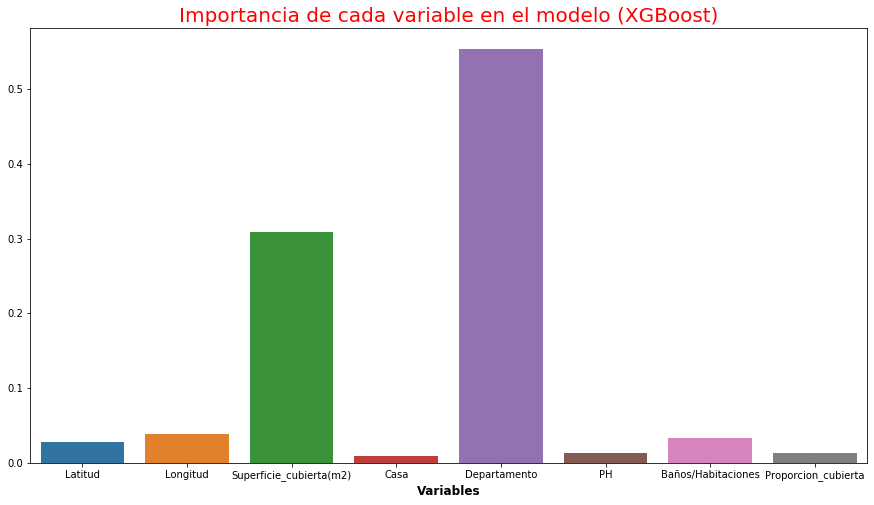

In [109]:
importances = XGBoost_model.best_estimator_.feature_importances_
columns = X3.columns

plt.figure(figsize = (15,8))
sns.barplot(columns, importances)
plt.title("Importancia de cada variable en el modelo (XGBoost)", fontsize = 20, color = "r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.show()

Dado que el resultado obtenido por este método no es del todo convincente (no creemos que el dato más importante para predecir el precio de una propiedad sea saber si es un departamento o no), se decidió calcular la importancia de las variables con otro método (Permutation importance) que puede darnos una mejor respuesta sobre la importancia de la información brindada por cada variable a la hora de predecir el precio.

In [107]:
result = permutation_importance(XGBoost_model, X3, y, n_repeats=10, random_state=42)

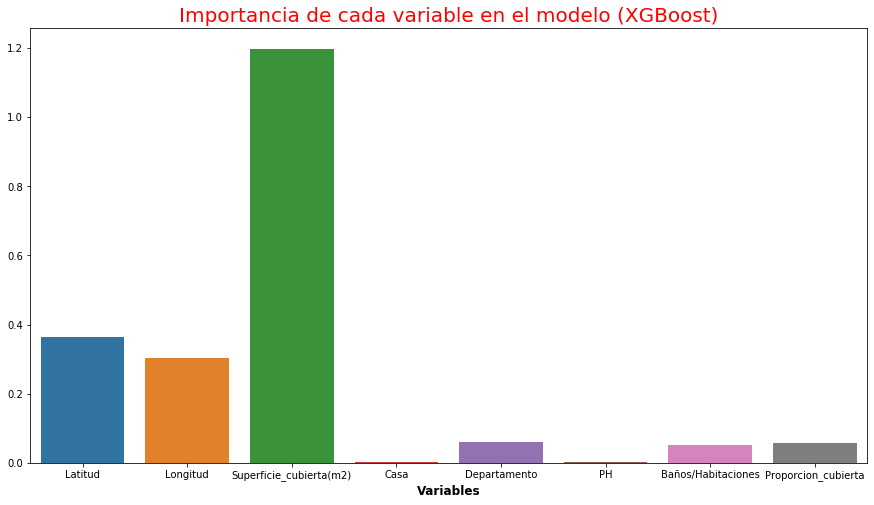

In [110]:
importances3 = result.importances_mean
columns = X3.columns

plt.figure(figsize = (15,8))
sns.barplot(columns, importances3)
plt.title("Importancia de cada variable en el modelo (XGBoost)", fontsize = 20, color = "r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.show()

Con este nuevo resultado obtenido podemos ver que la variables más importante para nuestro modelo sigue siendo la "Superficie cubierta", seguido por las dos variables que nos indican la ubicación ("Latitud", y "Longitud").

A modo de conclusión podemos decir que se obtuvo una gran mejora en los resultados con el nuevo modelo XGBoost, sin embargo quedan muchas cosas por mejorar y analizar. En primer lugar, cómo ya lo mencioné en el Proyecto 1, es probable que se puedan obtener mejores resultados si incorporamos variables con las que no contamos en este dataset (o al menos no de forma confiable y directa, ya que no se analizó el texto de las publicaciones), como ser la presencia de piscinas, concheras, balcones, etc. Las cuales son características que le agregan o quitan valor a una propiedad si están o no presentes. También se podría analizar mejor los modelos de Bagging y AdaBoost con un procesador mejor que permita realizar pruebas más exigentes para así determinar si se pueden obtener mejores resultados o analizar si, más allá de las optimizaciones, la falta de mejora en estos modelos se debe a una cuestión intrínseca de los modelos.